In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from ta.volume import VolumeWeightedAveragePrice
import requests


plt.style.use('dark_background')

In [230]:
df = yf.download("SPY", period="max", interval = '1d')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.547981,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.729683,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.784189,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.056761,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.165781,531500
...,...,...,...,...,...,...
2022-05-27,407.910004,415.380005,407.700012,415.260010,415.260010,84768700
2022-05-31,413.549988,416.459991,410.029999,412.929993,412.929993,95937000
2022-06-01,415.170013,416.239990,406.929993,409.589996,409.589996,86585800


In [231]:
def EMA(data, period = 50, adjust = False):
  return data['Close'].ewm( span = period, adjust = adjust ).mean();

In [232]:
ema7 = EMA(df, period = 7, adjust = False)
ema14 = EMA(df, period = 14, adjust = False)
ema50 = EMA(df, period = 50, adjust = False)
ema100 = EMA(df, period = 100, adjust = False)
ema200 = EMA(df, period = 200, adjust = False)

df['EMA7'] = ema14
df['EMA14'] = ema14
df['EMA50'] = ema50
df['EMA100'] = ema100
df['EMA200'] = ema200

df.dropna()


df

,Open,High,Low,Close,Adj Close,Volume,EMA7,EMA14,EMA50,EMA100,EMA200
Date,,,,,,,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,25.547981,1003200,43.937500,43.937500,43.937500,43.937500,43.937500
1993-02-01,43.968750,44.250000,43.968750,44.250000,25.729683,480500,43.979167,43.979167,43.949755,43.943688,43.940609
1993-02-02,44.218750,44.375000,44.125000,44.343750,25.784189,201300,44.027778,44.027778,43.965206,43.951610,43.944621
1993-02-03,44.406250,44.843750,44.375000,44.812500,26.056761,529400,44.132407,44.132407,43.998433,43.968657,43.953256
1993-02-04,44.968750,45.093750,44.468750,45.000000,26.165781,531500,44.248086,44.248086,44.037710,43.989080,43.963672
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,407.910004,415.380005,407.700012,415.260010,415.260010,84768700,402.648617,402.648617,418.641486,429.633877,432.347844
2022-05-31,413.549988,416.459991,410.029999,412.929993,412.929993,95937000,404.019467,404.019467,418.417505,429.303107,432.154631
2022-06-01,415.170013,416.239990,406.929993,409.589996,409.589996,86585800,404.762204,404.762204,418.071329,428.912749,431.930107


In [233]:
def buyCloseSellOpen(data, check_ema = True):

  profits = []
  hodl_profits = []
  investment = 1000
  hodl_investment = 1000
  hodl_qty = 1000 / data['Close'][0]
  hodl_changes = []
  inv_changes = []

  for i in range (len(data)):
        
    
    trade_qty = investment / data['Close'][i-1]


    if(i>1):
        if(df['Close'][i-1]>df['EMA200'][i-1] or check_ema == False):
            profit = (data['Open'][i] - data['Close'][i-1] ) * trade_qty
            hodl_profit =  (data['Close'][i] - data['Close'][i-1] ) * hodl_qty
            investment = investment + profit
            profits.append(profit)
            hodl_profits.append(hodl_profit)
            hodl_investment = hodl_investment + hodl_profit
            hodl_changes.append(hodl_investment)
            inv_changes.append(investment)
        else:   
            hodl_profit =  (data['Close'][i] - data['Close'][i-1] ) * hodl_qty
            hodl_profits.append(hodl_profit)
            hodl_investment = hodl_investment + hodl_profit
            hodl_changes.append(hodl_investment)
            inv_changes.append(investment)
        
  print("Total Investment : ",investment)
  print("Total HODL Investment : ",hodl_investment)

  return [ profits, hodl_profits, hodl_changes, inv_changes ]

In [234]:
profits, hodl_profits, hodl_changes, inv_changes = buyCloseSellOpen(df,False)

Total Investment :  10154.820791869864
Total HODL Investment :  9336.614703725101


In [235]:
profits = np.array(profits)
hodl_profits = np.array(hodl_profits)

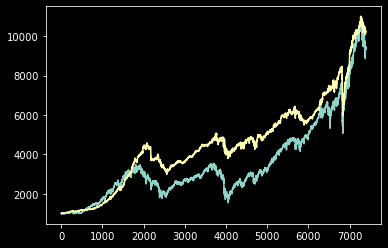

In [236]:
plt.plot(hodl_changes)
plt.plot(inv_changes)

In [237]:
trade_profits = profits[profits>0]
trade_losses = profits[profits<0]

hold_profits = hodl_profits[hodl_profits>0]
hold_losses = hodl_profits[hodl_profits<0]

In [238]:
trade_win_rate = (len(trade_profits))/len(profits)*100
hold_win_rate = (len(hold_profits))/len(hodl_profits)*100
trade_win_rate,hold_win_rate

(54.81120584652862, 53.52551089457302)